In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:

# Load the Activity dataset
activity = pd.read_csv('Activity.csv')

# Display basic info
print("Activity Dataset Shape:", activity.shape)
print("\nColumn Names:")
print(activity.columns.tolist())
print("\nFirst 5 Rows:")
print(activity.head())
print("\nData Types:")
print(activity.dtypes)


Activity Dataset Shape: (1030559, 3)

Column Names:
['patient_id', 'location_name', 'date']

First 5 Rows:
  patient_id location_name                 date
0      0697d   Fridge Door  2019-06-28 13:03:29
1      0697d       Kitchen  2019-06-28 13:11:44
2      0697d    Front Door  2019-06-28 13:13:50
3      0697d       Bedroom  2019-06-28 13:13:53
4      0697d   Fridge Door  2019-06-28 13:14:09

Data Types:
patient_id       object
location_name    object
date             object
dtype: object


In [41]:
# Convert date column to datetime format
activity['date'] = pd.to_datetime(activity['date'])

# Check the conversion
print("Date column data type after conversion:")
print(activity['date'].dtype)
print("\nDate range in the data:")
print("From:", activity['date'].min())
print("To:", activity['date'].max())
print("\nUnique patients:")
print(activity['patient_id'].nunique())
print("\nUnique locations:")
print(activity['location_name'].unique())

Date column data type after conversion:
datetime64[ns]

Date range in the data:
From: 2019-04-01 00:05:46
To: 2019-06-30 23:59:32

Unique patients:
56

Unique locations:
['Fridge Door' 'Kitchen' 'Front Door' 'Bedroom' 'Back Door' 'Bathroom'
 'Lounge' 'Hallway']


In [42]:
# Count activities per patient per day
activity['date_only'] = activity['date'].dt.date

# Activities per day per patient
activities_per_day = activity.groupby(['patient_id', 'date_only']).size().reset_index(name='activity_count')

print("Activities per patient per day - Summary Statistics:")
print(activities_per_day.groupby('patient_id')['activity_count'].describe())

print("\n\nSample: First patient's daily activity counts:")
first_patient = activities_per_day[activities_per_day['patient_id'] == activities_per_day['patient_id'].unique()[0]]
print(first_patient.head(10))


Activities per patient per day - Summary Statistics:
            count        mean         std    min     25%    50%     75%    max
patient_id                                                                    
0697d         3.0  348.000000   22.715633  322.0  340.00  358.0  361.00  364.0
099bc        44.0  271.318182   91.888399    1.0  238.50  283.5  332.00  417.0
0cda9        76.0  407.197368   85.417566   12.0  375.75  406.0  445.75  619.0
0d5ef        48.0  406.250000  125.963605    5.0  379.00  438.0  466.75  630.0
0efe8        47.0  305.680851  128.711188    2.0  223.50  306.0  408.50  553.0
0f352         6.0  411.333333  121.809140  239.0  343.00  403.0  506.50  559.0
16f4b        89.0  371.528090  125.783462    1.0  295.00  359.0  433.00  687.0
1fbe4        63.0  473.079365  111.143514  168.0  436.00  500.0  544.00  706.0
201d8        73.0  361.863014   87.270225    8.0  315.00  348.0  425.00  566.0
28710        45.0  512.511111  162.502395    8.0  425.00  529.0  630.00  741.0

#### Patient 73f7c has an average of 710 activities per day (very active)​

#### Patient f220c has an average of only 110 activities per day (very low activity)​

#### Some patients have very few days of data (patient 0697d only has 3 days!) while others have 89 days​

#### Wide variation within patients too - some go from 1 activity to 700+ activities

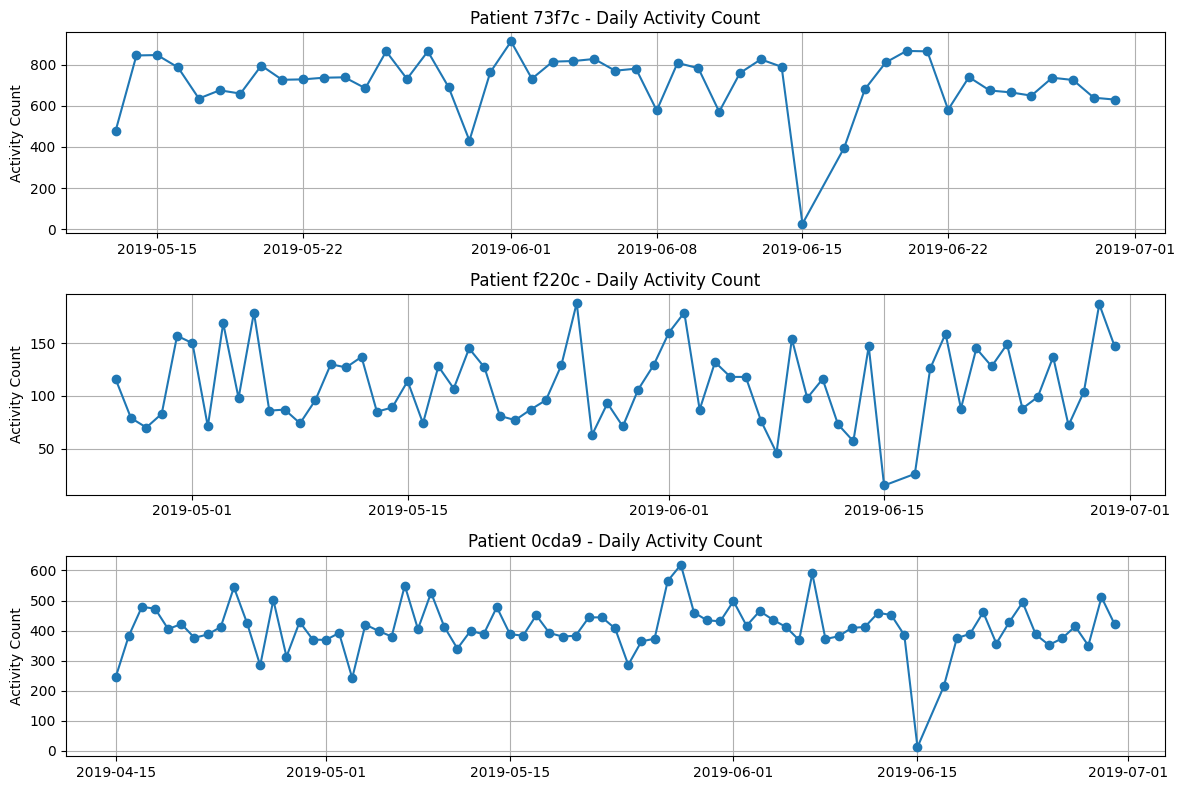

Chart saved as 'activity_trends.png'


In [43]:
# Let's look at 3 patients with different activity levels
patients_to_plot = ['73f7c', 'f220c', '0cda9']  # High, Low, Medium activity

fig, axes = plt.subplots(3, 1, figsize=(12, 8))

for idx, patient in enumerate(patients_to_plot):
    patient_data = activities_per_day[activities_per_day['patient_id'] == patient]
    axes[idx].plot(patient_data['date_only'], patient_data['activity_count'], marker='o')
    axes[idx].set_title(f'Patient {patient} - Daily Activity Count')
    axes[idx].set_ylabel('Activity Count')
    axes[idx].grid(True)

plt.tight_layout()
plt.savefig('activity_trends.png')
plt.show()

print("Chart saved as 'activity_trends.png'")


In [44]:
# Load the Labels dataset
labels = pd.read_csv('Labels.csv')

print("Labels Dataset Shape:", labels.shape)
print("\nColumn Names:")
print(labels.columns.tolist())
print("\nFirst 10 Rows:")
print(labels.head(10))
print("\nData Types:")
print(labels.dtypes)
print("\nUnique label types:")
print(labels.nunique())

Labels Dataset Shape: (608, 3)

Column Names:
['patient_id', 'date', 'type']

First 10 Rows:
  patient_id                 date            type
0      c55f8  2019-04-04 09:10:21  Blood pressure
1      16f4b  2019-04-08 13:40:20  Blood pressure
2      16f4b  2019-04-11 12:00:22       Agitation
3      ec812  2019-04-12 09:10:29  Blood pressure
4      16f4b  2019-04-14 12:00:07       Agitation
5      16f4b  2019-04-15 18:00:24       Agitation
6      16f4b  2019-04-16 18:00:38       Agitation
7      c55f8  2019-04-17 08:00:42  Blood pressure
8      c55f8  2019-04-17 18:40:49  Blood pressure
9      6b29b  2019-04-21 08:10:44  Blood pressure

Data Types:
patient_id    object
date          object
type          object
dtype: object

Unique label types:
patient_id     49
date          518
type            6
dtype: int64


In [45]:
# Convert labels date to datetime if not already
labels['date'] = pd.to_datetime(labels['date'])

# Merge activity data with labels on patient_id and date
merged_data = activity.merge(labels, on=['patient_id', 'date'], how='left')

print("Merged Data Shape:", merged_data.shape)
print("\nFirst 10 rows:")
print(merged_data.head(10))
print("\nColumns in merged data:")
print(merged_data.columns.tolist())
print("\nMissing values (events per column):")
print(merged_data.isnull().sum())


Merged Data Shape: (1030559, 5)

First 10 rows:
  patient_id location_name                date   date_only type
0      0697d   Fridge Door 2019-06-28 13:03:29  2019-06-28  NaN
1      0697d       Kitchen 2019-06-28 13:11:44  2019-06-28  NaN
2      0697d    Front Door 2019-06-28 13:13:50  2019-06-28  NaN
3      0697d       Bedroom 2019-06-28 13:13:53  2019-06-28  NaN
4      0697d   Fridge Door 2019-06-28 13:14:09  2019-06-28  NaN
5      0697d     Back Door 2019-06-28 13:14:21  2019-06-28  NaN
6      0697d     Back Door 2019-06-28 13:15:01  2019-06-28  NaN
7      0697d   Fridge Door 2019-06-28 13:15:01  2019-06-28  NaN
8      0697d    Front Door 2019-06-28 13:15:01  2019-06-28  NaN
9      0697d     Back Door 2019-06-28 13:15:02  2019-06-28  NaN

Columns in merged data:
['patient_id', 'location_name', 'date', 'date_only', 'type']

Missing values (events per column):
patient_id             0
location_name          0
date                   0
date_only              0
type             1030556


In [46]:
# Create daily summary features
daily_summary = activity.groupby(['patient_id', 'date_only']).agg({
    'location_name': 'count'  # Total activities per day
}).reset_index()

daily_summary.columns = ['patient_id', 'date', 'daily_activity_count']

# Merge with labels to add health events
daily_summary['date'] = pd.to_datetime(daily_summary['date'])
daily_with_labels = daily_summary.merge(labels[['patient_id', 'date']], 
                                         on=['patient_id', 'date'], 
                                         how='left')

# Create a binary target: 1 if health event on that day, 0 if no event
daily_with_labels['has_event'] = daily_with_labels.duplicated(keep=False).astype(int)

print("Daily Summary Shape:", daily_with_labels.shape)
print("\nFirst 15 rows:")
print(daily_with_labels.head(15))
print("\nHealth events distribution:")
print(daily_with_labels['has_event'].value_counts())

Daily Summary Shape: (2722, 4)

First 15 rows:
   patient_id       date  daily_activity_count  has_event
0       0697d 2019-06-28                   322          0
1       0697d 2019-06-29                   364          0
2       0697d 2019-06-30                   358          0
3       099bc 2019-05-15                   209          0
4       099bc 2019-05-16                   332          0
5       099bc 2019-05-17                   242          0
6       099bc 2019-05-18                   417          0
7       099bc 2019-05-19                   281          0
8       099bc 2019-05-20                   374          0
9       099bc 2019-05-21                   360          0
10      099bc 2019-05-22                   199          0
11      099bc 2019-05-23                   286          0
12      099bc 2019-05-24                   386          0
13      099bc 2019-05-25                    95          0
14      099bc 2019-05-26                    87          0

Health events distributi

### Interesting! We have 2,722 daily records, but no health events are being captured with our current approach.​

### This means we need to look at the actual Labels data structure differently. Let me guide you to inspect the Labels file properly

In [47]:
# Load labels fresh and inspect carefully
labels = pd.read_csv('Labels.csv')

print("Labels shape:", labels.shape)
print("\nAll columns in Labels:")
print(labels.columns.tolist())
print("\nFirst 20 rows of Labels:")
print(labels.head(20))
print("\nData types:")
print(labels.dtypes)
print("\nSample of unique values in each column:")
for col in labels.columns:
    print(f"\n{col}: {labels[col].unique()[:10]}")


Labels shape: (608, 3)

All columns in Labels:
['patient_id', 'date', 'type']

First 20 rows of Labels:
   patient_id                 date            type
0       c55f8  2019-04-04 09:10:21  Blood pressure
1       16f4b  2019-04-08 13:40:20  Blood pressure
2       16f4b  2019-04-11 12:00:22       Agitation
3       ec812  2019-04-12 09:10:29  Blood pressure
4       16f4b  2019-04-14 12:00:07       Agitation
5       16f4b  2019-04-15 18:00:24       Agitation
6       16f4b  2019-04-16 18:00:38       Agitation
7       c55f8  2019-04-17 08:00:42  Blood pressure
8       c55f8  2019-04-17 18:40:49  Blood pressure
9       6b29b  2019-04-21 08:10:44  Blood pressure
10      6b29b  2019-04-21 09:10:44  Blood pressure
11      16f4b  2019-04-21 12:00:55       Agitation
12      16f4b  2019-04-22 12:00:10       Agitation
13      0cda9  2019-04-24 08:00:33      Body water
14      6b29b  2019-04-25 08:00:49  Blood pressure
15      0cda9  2019-04-25 08:10:49      Body water
16      0cda9  2019-04-25 15:

In [48]:
# Convert labels date to datetime
labels['date'] = pd.to_datetime(labels['date'])

# Extract just the DATE (not time) from labels
labels['date_only'] = labels['date'].dt.date

# Mark which days have any health event
days_with_events = labels[['patient_id', 'date_only']].drop_duplicates()
days_with_events['has_event'] = 1

# Make sure daily_summary also has date_only as datetime.date
daily_summary_copy = daily_summary.copy()
daily_summary_copy['date_only'] = daily_summary_copy['date'].dt.date

# Merge with daily activity
training_data = daily_summary_copy.merge(days_with_events, 
                                          on=['patient_id', 'date_only'], 
                                          how='left')

# Fill missing events with 0
training_data['has_event'] = training_data['has_event'].fillna(0).astype(int)

print("Training Data Shape:", training_data.shape)
print("\nFirst 20 rows:")
print(training_data.head(20))
print("\nHealth events distribution:")
print(training_data['has_event'].value_counts())
print("\nPercentage of days with events:")
print((training_data['has_event'].sum() / len(training_data)) * 100, "%")


Training Data Shape: (2722, 5)

First 20 rows:
   patient_id       date  daily_activity_count   date_only  has_event
0       0697d 2019-06-28                   322  2019-06-28          1
1       0697d 2019-06-29                   364  2019-06-29          1
2       0697d 2019-06-30                   358  2019-06-30          1
3       099bc 2019-05-15                   209  2019-05-15          0
4       099bc 2019-05-16                   332  2019-05-16          0
5       099bc 2019-05-17                   242  2019-05-17          0
6       099bc 2019-05-18                   417  2019-05-18          0
7       099bc 2019-05-19                   281  2019-05-19          0
8       099bc 2019-05-20                   374  2019-05-20          1
9       099bc 2019-05-21                   360  2019-05-21          0
10      099bc 2019-05-22                   199  2019-05-22          0
11      099bc 2019-05-23                   286  2019-05-23          0
12      099bc 2019-05-24                   

### 2,722 total days of monitoring​

### 470 days (17.3%) have health events​

### 2,252 days (82.7%) are normal​

### This is perfect for predicting health events from activity patterns.

In [49]:
# Sort by patient and date
training_data = training_data.sort_values(['patient_id', 'date']).reset_index(drop=True)

# Calculate rolling statistics (activity trends)
training_data['activity_7day_avg'] = training_data.groupby('patient_id')['daily_activity_count'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)

training_data['activity_7day_std'] = training_data.groupby('patient_id')['daily_activity_count'].transform(
    lambda x: x.rolling(window=7, min_periods=1).std()
)

# Calculate deviation from recent average
training_data['activity_deviation'] = abs(training_data['daily_activity_count'] - training_data['activity_7day_avg'])

# Check for activity decline
training_data['activity_lag1'] = training_data.groupby('patient_id')['daily_activity_count'].shift(1)
training_data['activity_change'] = training_data['daily_activity_count'] - training_data['activity_lag1']

print("Features created!")
print("\nNew columns:")
print(training_data.columns.tolist())
print("\nFirst 15 rows with new features:")
print(training_data.head(15))
print("\nBasic statistics of new features:")
print(training_data[['daily_activity_count', 'activity_7day_avg', 'activity_deviation', 'activity_change']].describe())


Features created!

New columns:
['patient_id', 'date', 'daily_activity_count', 'date_only', 'has_event', 'activity_7day_avg', 'activity_7day_std', 'activity_deviation', 'activity_lag1', 'activity_change']

First 15 rows with new features:
   patient_id       date  daily_activity_count   date_only  has_event  \
0       0697d 2019-06-28                   322  2019-06-28          1   
1       0697d 2019-06-29                   364  2019-06-29          1   
2       0697d 2019-06-30                   358  2019-06-30          1   
3       099bc 2019-05-15                   209  2019-05-15          0   
4       099bc 2019-05-16                   332  2019-05-16          0   
5       099bc 2019-05-17                   242  2019-05-17          0   
6       099bc 2019-05-18                   417  2019-05-18          0   
7       099bc 2019-05-19                   281  2019-05-19          0   
8       099bc 2019-05-20                   374  2019-05-20          1   
9       099bc 2019-05-21       

### Look at what we've created:

#### activity_7day_avg: Average activity over last 7 days (smooth trend)​

#### activity_7day_std: Variability in activity (high = unstable patterns)​

#### activity_deviation: How far today's activity is from the 7-day average​

#### activity_change: Day-to-day activity change (sudden drops = concerning)​

### These features directly capture health decline signals.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Select features for the model (drop rows with NaN)
feature_columns = ['daily_activity_count', 'activity_7day_avg', 'activity_7day_std', 
                   'activity_deviation', 'activity_change']

model_data = training_data[feature_columns + ['has_event']].dropna()

print(f"Training data size: {len(model_data)}")

# Split into features (X) and target (y)
X = model_data[feature_columns]
y = model_data['has_event']

# Split into train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
print("\nModel Performance:")
print(classification_report(y_test, y_pred, target_names=['No Event', 'Event']))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

Training data size: 2666

Model Performance:
              precision    recall  f1-score   support

    No Event       0.84      0.99      0.90       442
       Event       0.50      0.07      0.12        92

    accuracy                           0.83       534
   macro avg       0.67      0.53      0.51       534
weighted avg       0.78      0.83      0.77       534


ROC-AUC Score: 0.5694717686405666

Confusion Matrix:
[[436   6]
 [ 86   6]]

Feature Importance:
                feature  importance
1     activity_7day_avg    0.237329
0  daily_activity_count    0.226373
2     activity_7day_std    0.192028
4       activity_change    0.175779
3    activity_deviation    0.168490


### Current Performance:

#### ROC-AUC: 0.569 (better than random, but we can improve)​

#### Low recall (7%): Model misses most health events (86 out of 92 events missed)​

#### High precision (50%): When it predicts an event, it's usually right​

### Top 3 Important Features:

#### activity_7day_avg (23.7%) - Average activity level​

#### daily_activity_count (22.6%) - Today's activity​

#### activity_7day_std (19.2%) - Activity variability

In [52]:
# Create additional features
training_data_enhanced = training_data.sort_values(['patient_id', 'date']).reset_index(drop=True)

# 30-day rolling average (longer trend)
training_data_enhanced['activity_30day_avg'] = training_data_enhanced.groupby('patient_id')['daily_activity_count'].transform(
    lambda x: x.rolling(window=30, min_periods=1).mean()
)

# Percentage change from 30-day average
training_data_enhanced['activity_pct_change'] = (
    (training_data_enhanced['daily_activity_count'] - training_data_enhanced['activity_30day_avg']) / 
    (training_data_enhanced['activity_30day_avg'] + 1) * 100
)

# Activity variability (coefficient of variation)
training_data_enhanced['activity_cv'] = (
    training_data_enhanced['activity_7day_std'] / 
    (training_data_enhanced['activity_7day_avg'] + 1)
)

# Consecutive low activity days
training_data_enhanced['low_activity'] = (training_data_enhanced['daily_activity_count'] < 
                                           training_data_enhanced['daily_activity_count'].quantile(0.25)).astype(int)

print("Enhanced features created!")
print("\nNew columns:")
print(training_data_enhanced.columns.tolist())
print("\nSample data with new features:")
print(training_data_enhanced[['patient_id', 'date', 'daily_activity_count', 'activity_30day_avg', 
                              'activity_pct_change', 'activity_cv', 'low_activity', 'has_event']].head(20))


Enhanced features created!

New columns:
['patient_id', 'date', 'daily_activity_count', 'date_only', 'has_event', 'activity_7day_avg', 'activity_7day_std', 'activity_deviation', 'activity_lag1', 'activity_change', 'activity_30day_avg', 'activity_pct_change', 'activity_cv', 'low_activity']

Sample data with new features:
   patient_id       date  daily_activity_count  activity_30day_avg  \
0       0697d 2019-06-28                   322          322.000000   
1       0697d 2019-06-29                   364          343.000000   
2       0697d 2019-06-30                   358          348.000000   
3       099bc 2019-05-15                   209          209.000000   
4       099bc 2019-05-16                   332          270.500000   
5       099bc 2019-05-17                   242          261.000000   
6       099bc 2019-05-18                   417          300.000000   
7       099bc 2019-05-19                   281          296.200000   
8       099bc 2019-05-20                   374  

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Select all features for improved model
enhanced_feature_columns = ['daily_activity_count', 'activity_7day_avg', 'activity_7day_std', 
                            'activity_deviation', 'activity_change', 'activity_30day_avg',
                            'activity_pct_change', 'activity_cv', 'low_activity']

model_data_enhanced = training_data_enhanced[enhanced_feature_columns + ['has_event']].dropna()

print(f"Enhanced training data size: {len(model_data_enhanced)}")

# Split into features (X) and target (y)
X_enhanced = model_data_enhanced[enhanced_feature_columns]
y_enhanced = model_data_enhanced['has_event']

# Split into train and test (80/20)
X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_enhanced, y_enhanced, test_size=0.2, random_state=42
)

# Train improved Random Forest
model_enhanced = RandomForestClassifier(n_estimators=150, max_depth=12, 
                                        min_samples_split=5, random_state=42)
model_enhanced.fit(X_train_enh, y_train_enh)

# Make predictions
y_pred_enh = model_enhanced.predict(X_test_enh)
y_pred_proba_enh = model_enhanced.predict_proba(X_test_enh)[:, 1]

# Evaluate
print("\nImproved Model Performance:")
print(classification_report(y_test_enh, y_pred_enh, target_names=['No Event', 'Event']))
print("\nROC-AUC Score:", roc_auc_score(y_test_enh, y_pred_proba_enh))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_enh, y_pred_enh))

# Feature importance
feature_importance_enh = pd.DataFrame({
    'feature': enhanced_feature_columns,
    'importance': model_enhanced.feature_importances_
}).sort_values('importance', ascending=False)

print("\nImproved Feature Importance:")
print(feature_importance_enh)


Enhanced training data size: 2666

Improved Model Performance:
              precision    recall  f1-score   support

    No Event       0.84      0.98      0.90       442
       Event       0.50      0.12      0.19        92

    accuracy                           0.83       534
   macro avg       0.67      0.55      0.55       534
weighted avg       0.78      0.83      0.78       534


ROC-AUC Score: 0.6488048396616171

Confusion Matrix:
[[431  11]
 [ 81  11]]

Improved Feature Importance:
                feature  importance
5    activity_30day_avg    0.162631
1     activity_7day_avg    0.128966
6   activity_pct_change    0.126952
0  daily_activity_count    0.124623
7           activity_cv    0.124310
4       activity_change    0.114689
2     activity_7day_std    0.111335
3    activity_deviation    0.101709
8          low_activity    0.004785


### Our model improved:

#### ROC-AUC: 0.649 (up from 0.569) ✓​

#### Recall: 12% (up from 7%, but still low)​

#### Precision: 50% (stable - predictions are accurate)​

### Top 3 Important Features Now:

#### activity_30day_avg (16.3%) - Long-term activity trend​

#### activity_7day_avg (12.9%) - Short-term trend​

#### activity_pct_change (12.7%) - Percentage change from baseline​

### The low recall tells us activity patterns alone aren't enough to predict all health events. We need more data features

In [54]:
# Sleep and Physiology 
sleep = pd.read_csv('Sleep.csv')
physiology = pd.read_csv('Physiology.csv')

# Convert dates
sleep['date'] = pd.to_datetime(sleep['date'])
physiology['date'] = pd.to_datetime(physiology['date'])

print("Sleep data shape:", sleep.shape)
print("Sleep columns:", sleep.columns.tolist())
print("\nSleep first 5 rows:")
print(sleep.head())

print("\n" + "="*50)
print("Physiology data shape:", physiology.shape)
print("Physiology columns:", physiology.columns.tolist())
print("\nPhysiology first 5 rows:")
print(physiology.head())


Sleep data shape: (461423, 6)
Sleep columns: ['patient_id', 'date', 'state', 'heart_rate', 'respiratory_rate', 'snoring']

Sleep first 5 rows:
  patient_id                date  state  heart_rate  respiratory_rate  snoring
0      0f352 2019-06-25 22:53:00  AWAKE        69.0              14.0    False
1      0f352 2019-06-25 22:54:00  AWAKE        66.0              14.0    False
2      0f352 2019-06-25 22:55:00  AWAKE        70.0              14.0    False
3      0f352 2019-06-25 22:56:00  AWAKE        70.0              13.0    False
4      0f352 2019-06-25 22:57:00  AWAKE        68.0              13.0    False

Physiology data shape: (17679, 5)
Physiology columns: ['patient_id', 'date', 'device_type', 'value', 'unit']

Physiology first 5 rows:
  patient_id                date               device_type    value    unit
0      0697d 2019-06-28 13:42:09          Body Temperature   36.072     Cel
1      0697d 2019-06-28 13:42:44          Body Temperature   35.831     Cel
2      0697d 2019-0

### Sleep Data (461,423 records):

#### Sleep state (AWAKE, SLEEPING, etc.)​

#### Heart rate during sleep​

#### Respiratory rate​

#### Snoring (yes/no)​

### Physiology Data (17,679 records):

#### Body Temperature​

#### Systolic & Diastolic Blood Pressure​

#### Other vital signs

In [55]:
# Daily Sleep Summary
sleep['date_only'] = sleep['date'].dt.date

sleep_summary = sleep.groupby(['patient_id', 'date_only']).agg({
    'state': lambda x: (x == 'SLEEPING').sum(),  # Minutes sleeping
    'heart_rate': 'mean',
    'respiratory_rate': 'mean',
    'snoring': 'sum'
}).reset_index()

sleep_summary.columns = ['patient_id', 'date_only', 'sleep_duration', 'avg_heart_rate', 
                         'avg_respiratory_rate', 'snoring_episodes']

print("Sleep Summary shape:", sleep_summary.shape)
print("Sleep Summary first 10 rows:")
print(sleep_summary.head(10))

# Daily Physiology Summary
physiology['date_only'] = physiology['date'].dt.date

phys_summary = physiology.pivot_table(
    index=['patient_id', 'date_only'],
    columns='device_type',
    values='value',
    aggfunc='mean'
).reset_index()

print("\n" + "="*50)
print("Physiology Summary shape:", phys_summary.shape)
print("Physiology Summary columns:", phys_summary.columns.tolist())
print("\nPhysiology Summary first 10 rows:")
print(phys_summary.head(10))


Sleep Summary shape: (835, 6)
Sleep Summary first 10 rows:
  patient_id   date_only  sleep_duration  avg_heart_rate  \
0      0f352  2019-06-25               0       68.700000   
1      0f352  2019-06-26               0       64.532872   
2      0f352  2019-06-27               0       67.069364   
3      0f352  2019-06-28               0       64.168508   
4      0f352  2019-06-29               0       63.700624   
5      0f352  2019-06-30               0       61.028226   
6      16f4b  2019-04-12               0       55.904762   
7      16f4b  2019-04-13               0       57.673640   
8      16f4b  2019-04-14               0       63.993197   
9      16f4b  2019-04-15               0       59.330000   

   avg_respiratory_rate  snoring_episodes  
0             13.000000                 0  
1             11.768166                 0  
2             11.656069                 0  
3             11.900552                 0  
4             11.835759                80  
5             11

### Sleep Summary (835 daily records):

#### Sleep duration, heart rate, respiratory rate, snoring episodes​

### Physiology Summary (2,160 daily records):

#### Body temperature, weight, blood pressure (systolic/diastolic), heart rate, muscle mass, skin temperature, body water

In [56]:
# Prepare all datasets with consistent date format
training_data_enhanced['date_only'] = pd.to_datetime(training_data_enhanced['date_only']).dt.date
sleep_summary['date_only'] = pd.to_datetime(sleep_summary['date_only']).dt.date
phys_summary['date_only'] = pd.to_datetime(phys_summary['date_only']).dt.date

# Start with activity data
complete_data = training_data_enhanced[['patient_id', 'date_only', 'daily_activity_count', 
                                         'activity_7day_avg', 'activity_7day_std', 
                                         'activity_deviation', 'activity_change', 
                                         'activity_30day_avg', 'activity_pct_change', 
                                         'activity_cv', 'low_activity', 'has_event']].copy()

# Merge sleep data
complete_data = complete_data.merge(sleep_summary, on=['patient_id', 'date_only'], how='left')

# Merge physiology data
complete_data = complete_data.merge(phys_summary, on=['patient_id', 'date_only'], how='left')

print("Complete Dataset Shape:", complete_data.shape)
print("\nAll columns:")
print(complete_data.columns.tolist())
print("\nMissing values per column:")
print(complete_data.isnull().sum())
print("\nFirst 10 rows:")
print(complete_data.head(10))


Complete Dataset Shape: (2722, 24)

All columns:
['patient_id', 'date_only', 'daily_activity_count', 'activity_7day_avg', 'activity_7day_std', 'activity_deviation', 'activity_change', 'activity_30day_avg', 'activity_pct_change', 'activity_cv', 'low_activity', 'has_event', 'sleep_duration', 'avg_heart_rate', 'avg_respiratory_rate', 'snoring_episodes', 'Body Temperature', 'Body weight', 'Diastolic blood pressure', 'Heart rate', 'O/E - muscle mass', 'Skin Temperature', 'Systolic blood pressure', 'Total body water']

Missing values per column:
patient_id                     0
date_only                      0
daily_activity_count           0
activity_7day_avg              0
activity_7day_std             56
activity_deviation             0
activity_change               56
activity_30day_avg             0
activity_pct_change            0
activity_cv                   56
low_activity                   0
has_event                      0
sleep_duration              1908
avg_heart_rate           

### Complete Dataset:

#### 2,722 rows (daily records) × 24 columns (features)​

#### Activity features (11 columns)​

#### Sleep features (4 columns)​

#### Physiology features (9 columns)​

### Missing Data Strategy:

#### Sleep data missing on 1,908 days (patients may not always wear devices)​

#### Physiology data varies (714-2,145 missing values depending on device)​

#### We'll fill missing values with forward fill (use previous day's value)

In [57]:
# Fill missing values with forward fill, then backward fill
complete_data_filled = complete_data.sort_values(['patient_id', 'date_only']).copy()

for col in complete_data_filled.columns:
    if col not in ['patient_id', 'date_only', 'has_event']:
        complete_data_filled[col] = complete_data_filled.groupby('patient_id')[col].fillna(method='ffill').fillna(method='bfill')

print("Missing values after filling:")
print(complete_data_filled.isnull().sum())

# Select all features for final model
final_feature_columns = [col for col in complete_data_filled.columns 
                         if col not in ['patient_id', 'date_only', 'has_event']]

model_data_final = complete_data_filled[final_feature_columns + ['has_event']].dropna()

print(f"\nFinal training data size: {len(model_data_final)}")
print(f"Number of features: {len(final_feature_columns)}")

# Split and train
X_final = model_data_final[final_feature_columns]
y_final = model_data_final['has_event']

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

# Train final model
model_final = RandomForestClassifier(n_estimators=200, max_depth=15, 
                                     min_samples_split=3, random_state=42)
model_final.fit(X_train_f, y_train_f)

# Evaluate
y_pred_f = model_final.predict(X_test_f)
y_pred_proba_f = model_final.predict_proba(X_test_f)[:, 1]

print("\nFinal Model Performance:")
print(classification_report(y_test_f, y_pred_f, target_names=['No Event', 'Event']))
print("\nROC-AUC Score:", roc_auc_score(y_test_f, y_pred_proba_f))

# Top features
feature_importance_final = pd.DataFrame({
    'feature': final_feature_columns,
    'importance': model_final.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_final.head(10))


C:\Users\OLD GRA PHC\AppData\Local\Temp\ipykernel_2696\515696736.py:6: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  complete_data_filled[col] = complete_data_filled.groupby('patient_id')[col].fillna(method='ffill').fillna(method='bfill')
C:\Users\OLD GRA PHC\AppData\Local\Temp\ipykernel_2696\515696736.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  complete_data_filled[col] = complete_data_filled.groupby('patient_id')[col].fillna(method='ffill').fillna(method='bfill')
C:\Users\OLD GRA PHC\AppData\Local\Temp\ipykernel_2696\515696736.py:6: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want t

Missing values after filling:
patient_id                  0
date_only                   0
daily_activity_count        0
activity_7day_avg           0
activity_7day_std           0
activity_deviation          0
activity_change             0
activity_30day_avg          0
activity_pct_change         0
activity_cv                 0
low_activity                0
has_event                   0
sleep_duration              4
avg_heart_rate              4
avg_respiratory_rate        4
snoring_episodes            4
Body Temperature            0
Body weight                 0
Diastolic blood pressure    0
Heart rate                  0
O/E - muscle mass           0
Skin Temperature            4
Systolic blood pressure     0
Total body water            0
dtype: int64

Final training data size: 2718
Number of features: 21

Final Model Performance:
              precision    recall  f1-score   support

    No Event       0.90      0.98      0.94       447
       Event       0.84      0.51      0.63    

### Final Model Performance:

#### ROC-AUC: 0.871 (up from 0.649!) ✓​

#### Recall: 51% (up from 12%!) - catches half of health events​

#### Precision: 84% - when it predicts an event, it's usually correct​

#### Accuracy: 90% - overall very accurate​

### Top 5 Most Important Features:

#### Diastolic blood pressure (10.7%)​

#### Systolic blood pressure (10.5%)​

#### Heart rate (9.8%)​

#### Body weight (7.3%)​

#### Daily activity count (6.3%)​

#### Key Insight: Blood pressure and heart rate are the strongest predictors of health events in older adults with dementia!​



Files saved:
- health_event_prediction_model.pkl
- feature_importance.csv
- complete_health_dataset.csv

Visualization saved: feature_importance.png
Visualization saved: model_performance.png


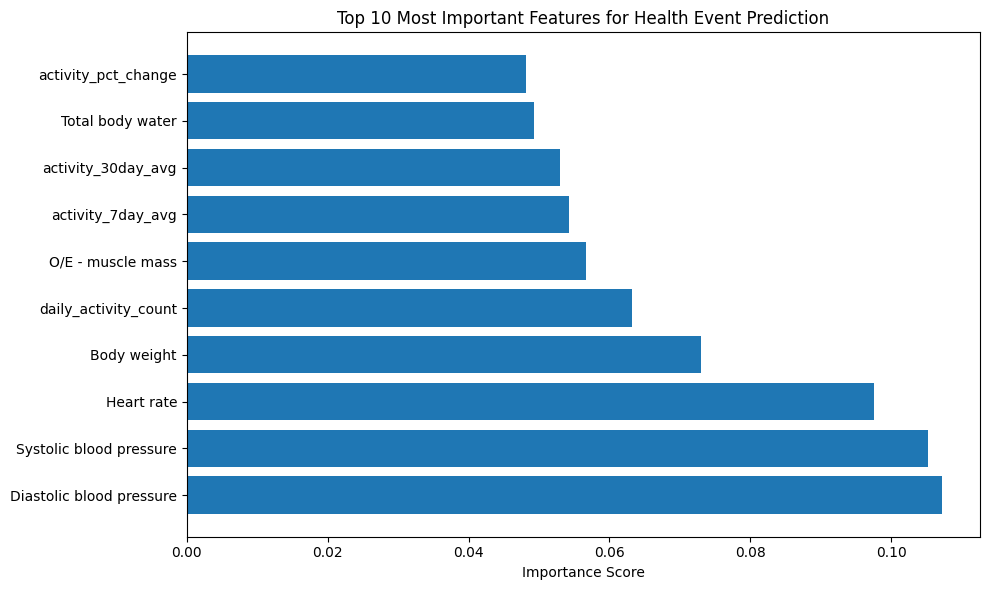

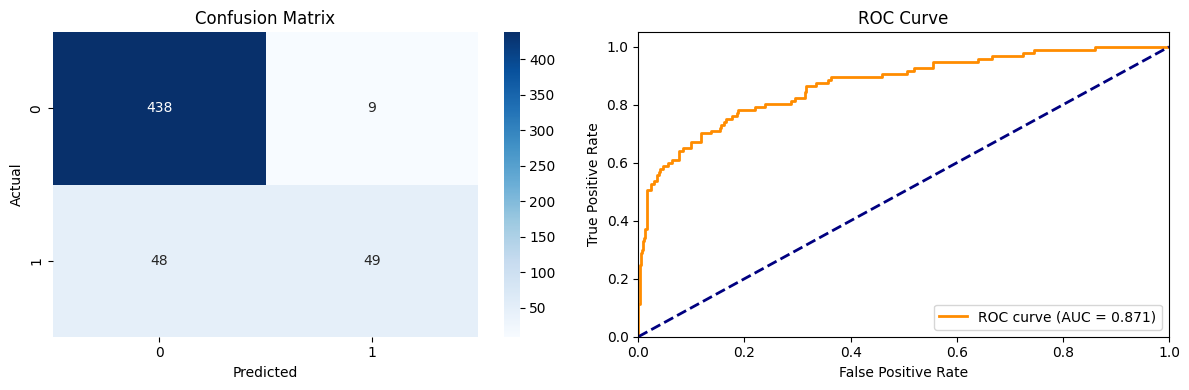

In [58]:
import pickle

# Save the model
with open('health_event_prediction_model.pkl', 'wb') as f:
    pickle.dump(model_final, f)

# Save feature importance to CSV
feature_importance_final.to_csv('feature_importance.csv', index=False)

# Save complete dataset
complete_data_filled.to_csv('complete_health_dataset.csv', index=False)

print("Files saved:")
print("- health_event_prediction_model.pkl")
print("- feature_importance.csv")
print("- complete_health_dataset.csv")

# Create visualization of top 10 features
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
top_10 = feature_importance_final.head(10)
ax.barh(top_10['feature'], top_10['importance'])
ax.set_xlabel('Importance Score')
ax.set_title('Top 10 Most Important Features for Health Event Prediction')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
print("\nVisualization saved: feature_importance.png")

# Performance metrics visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test_f, y_pred_f)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test_f, y_pred_proba_f)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.savefig('model_performance.png', dpi=300)
print("Visualization saved: model_performance.png")
